<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Grafico_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

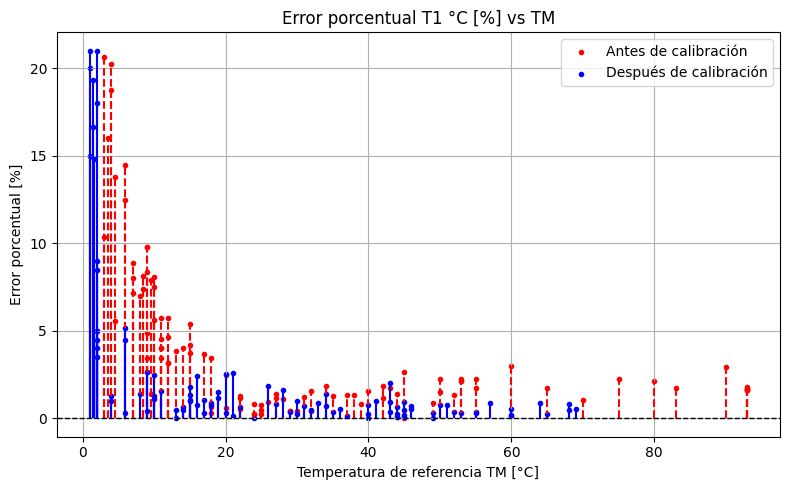

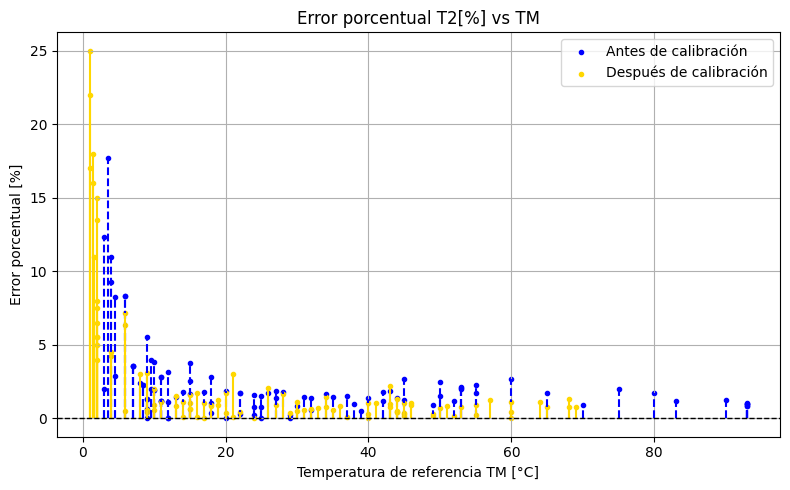

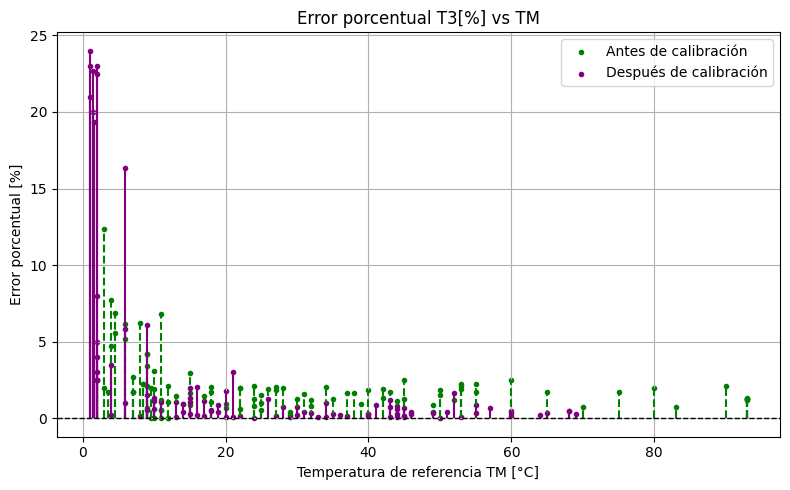

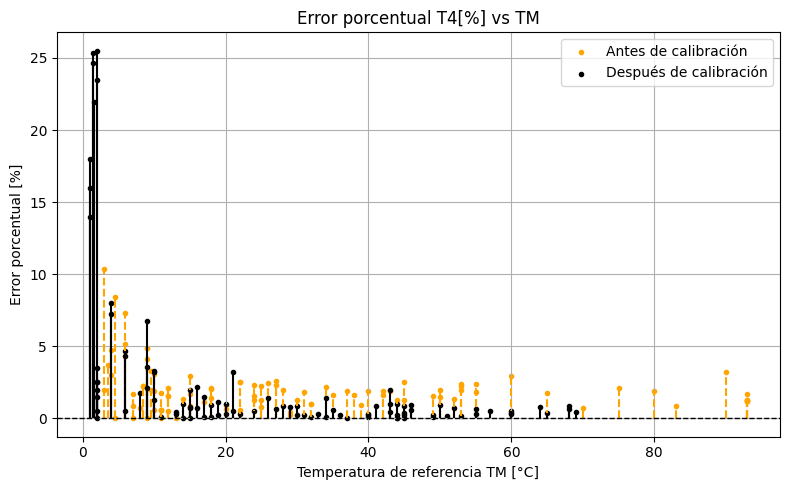

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# === Parámetros ===
fila_inicio_antes = 5      # Fila inicial para el archivo 'antes'
fila_inicio_despues = 28   # Fila inicial para el archivo 'después'
archivo_antes = '1.csv'
archivo_despues = '2.csv'

# === Leer CSVs ===
df_antes = pd.read_csv(archivo_antes, encoding='latin-1').iloc[5:]
df_despues = pd.read_csv(archivo_despues, encoding='latin-1').iloc[28:]

# === Nombres de columnas ===
errores_col = ['T1 °C [%]', 'T2[%]', 'T3[%]', 'T4[%]']
TM_col = 'TM °C'

# === Extraer columnas (separadas por archivo) ===
TM_antes = df_antes[TM_col].values
TM_despues = df_despues[TM_col].values
errores_antes = df_antes[errores_col]
errores_despues = df_despues[errores_col]

# === Emparejar longitud mínima entre ambos CSV ===
min_rows = min(len(TM_antes), len(TM_despues))
TM_antes = TM_antes[:min_rows]
TM_despues = TM_despues[:min_rows]
errores_antes = errores_antes.iloc[:min_rows]
errores_despues = errores_despues.iloc[:min_rows]

# === Colores y marcador ===
colores_antes = ['red', 'blue', 'green', 'orange']
colores_despues = ['blue', 'gold', 'purple', 'black']
marcador = '.'  # Punto literal

# === Graficar ===
for i, sensor in enumerate(errores_col):
    plt.figure(figsize=(8, 5))

    # Puntos antes de calibración
    plt.scatter(TM_antes, errores_antes[sensor], color=colores_antes[i],
                marker=marcador, label='Antes de calibración')
    plt.vlines(TM_antes, ymin=0, ymax=errores_antes[sensor],
               colors=colores_antes[i], linestyles='--')

    # Puntos después de calibración
    plt.scatter(TM_despues, errores_despues[sensor], color=colores_despues[i],
                marker=marcador, label='Después de calibración')
    plt.vlines(TM_despues, ymin=0, ymax=errores_despues[sensor],
               colors=colores_despues[i], linestyles='-')

    # Gráfica
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.title(f'Error porcentual {sensor} vs TM')
    plt.xlabel('Temperatura de referencia TM [°C]')
    plt.ylabel('Error porcentual [%]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

